In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')



# Alzheimer’s Analysis

## Introduction
### About Dementia
Dementia is not a specific disease. It’s an overall term that describes a group of symptoms associated with a decline in memory or other thinking skills severe enough to reduce a person’s ability to perform everyday activities. Alzheimer’s disease accounts for 60 to 80 percent of cases. Vascular dementia, which occurs after a stroke, is the second most common dementia type. But there are many other conditions that can cause symptoms of dementia, including some that are reversible, such as thyroid problems and vitamin deficiencies.

Dementia is a general term for loss of memory and other mental abilities severe enough to interfere with daily life. It is caused by physical changes in the brain. Alzheimer's is the most common type of dementia, but there are many kinds.

### Alzheimer
  

- Alzheimer's is a type of dementia that causes problems with memory, thinking and behavior. Symptoms usually develop slowly and get worse over time, becoming severe enough to interfere with daily tasks. <br><br>

- Alzheimer's is not a normal part of aging. The greatest known risk factor is increasing age, and the majority of people with Alzheimer's are 65 and older. But Alzheimer's is not just a disease of old age. Approximately 200,000 Americans under the age of 65 have younger-onset Alzheimer’s disease (also known as early-onset Alzheimer’s). <br><br>

-  Alzheimer's is the sixth leading cause of death in the United States. Those with Alzheimer's live an average of eight years after their symptoms become noticeable to others, but survival can range from four to 20 years, depending on age and other health conditions. <br><br>

- Alzheimer's has no current cure, but treatments for symptoms are available and research continues. Although current Alzheimer's treatments cannot stop Alzheimer's from progressing, they can temporarily slow the worsening of dementia symptoms and improve quality of life for those with Alzheimer's and their caregivers. Today, there is a worldwide effort under way to find better ways to treat the disease, delay its onset, and prevent it from developing.

### Understanding the data
> **Summary**: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

**Dataset Description** 
- We will be using the longitudinal MRI data.
- The dataset consists of a longitudinal MRI data of 150 subjects aged 60 to 96.
- Each subject was scanned at least once.
- Everyone is right-handed.
- 72 of the subjects were grouped as 'Nondemented' throughout the study.
- 64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
- 14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.


| COL  | Description                         |
|------|-------------------------------------|
| EDUC | Years of Education                  |
| SES  | Socioeconomic Status                |
| MMSE | Mini Mental State Examination       |
| CDR  | Clinical Dementia Rating            |
| eTIV | Estimated Total Intracranial Volume |
| nWBV | Normalize Whole Brain Volume        |
| ASF  | Atlas Scaling Factor                |

#### Mini–Mental State Examination (MMSE)
> The Mini–Mental State Examination (MMSE) or Folstein test is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment. It is commonly used in medicine and allied health to screen for dementia. It is also used to estimate the severity and progression of cognitive impairment and to follow the course of cognitive changes in an individual over time; thus making it an effective way to document an individual's response to treatment. The MMSE's purpose has been not, on its own, to provide a diagnosis for any particular nosological entity.
> - **Cognitive Impairment:** Cognitive impairment is when a person has trouble remembering, learning new things, concentrating, or making decisions that affect their everyday life. Cognitive impairment ranges from mild to severe.

> Any score greater than or equal to 24 points (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment. The raw score may also need to be corrected for educational attainment and age. That is, a maximal score of 30 points can never rule out dementia.


|   **Method**  |**Score**|  **Interpretation**                   |                   
|---------------|---------|--------------------------------------|
| Single Cutoff |   <24   |        Abnormal                      |
|     Range     |   <21   |  Increased Odds of Dementia          |
|               |   <25   |  Decreased Odds of Dementia          |
|   Education   |    21   |  Abnormal for 8th Grade Education    |
|               |   <23   |  Abnormal for High School Education  |
|               |   <24   |  Abnormal for College Education      |
|   Severity    |  24-30  |  No Cognitive Impairment             |
|               |  18-23  |  Mild Cognitive Impairment           |
|               |   0-17  |  Severe Cognitive Impairment         |

#### Clinical Dementia Rating (CDR)
> The CDR is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care. The necessary information to make each rating is obtained through a semi-structured interview of the patient and a reliable informant or collateral source (e.g., family member).<br><br>
> The CDR table provides descriptive anchors that guide the clinician in making appropriate ratings based on interview data and clinical judgment. In addition to ratings for each domain, an overall CDR score may be calculated through the use of an algorithm. This score is useful for characterizing and tracking a patient's level of impairment/dementia:

| Score  | Description               |
|--------|---------------------------|
|    0   |        Normal             |
|    0.5 | Very Mild Dementia        | 
|    1   | Mild Dementia             |
|    2   | Moderate Dementia         |
|    3   | Severe Dementia           |[](http://)

####  Estimated Total Intracranial Volume(eTIV)
> Total intracranial volume (TIV/ICV) is an important covariate for volumetric analyses of the brain and brain regions, especially in the study of neurodegenerative diseases, where it can provide a proxy of maximum pre-morbid brain volume.<br><br>
> 1. > Unlike brain atrophy in the patients with AD, TIV did not vary over time. Mean TIV did not differ significantly between any of the subject groups. There was no association between TIV and age or age at symptom onset. The only significant predictor of TIV was sex. Men showed an approximately ∼12% larger eTIV than women. 

> 2. > We measured TIV with a semiautomated segmentation technique on T1- and T2-weighted MR images in 55 controls, 10 AD patients, and two persons at risk of familial AD. Whole-brain volumes also were measured and normalized with TIVs.

> 3. > The TIV normalization of cross-sectional brain volumes significantly reduced interindividual variation; the coefficient of variation (CV) was reduced from 10.0% to 6.0% in controls (P <.001). The TIVs measured on T1-weighted images had low variability (CV, 0.16%) and did not differ significantly from those measured on T2-weighted images (P =.16). The TIV normalization of serial brain-volume measurements reduced interimage differences caused by voxel-scaling variations (CV reduced from 1.3% to 0.5%, P =.002) in 10 controls and five AD patients.

#### Atlas Scaling Factor   (ASF)
A unified approach for morphometric and functional data analysis in young, old, and demented adults using automated atlas-based head size normalization: reliability and validation against manual measurement of total intracranial volume.

Basically, total intracranial volume is found to correlate with the determinant of the transform matrix used to align an image with an atlas. The work demonstrates that a one-parameter scaling factor provides a reasonable TIV estimation

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('data/oasis_longitudinal.csv')

# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [3]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
#print concise summery of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [7]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<Axes: xlabel='Group', ylabel='count'>

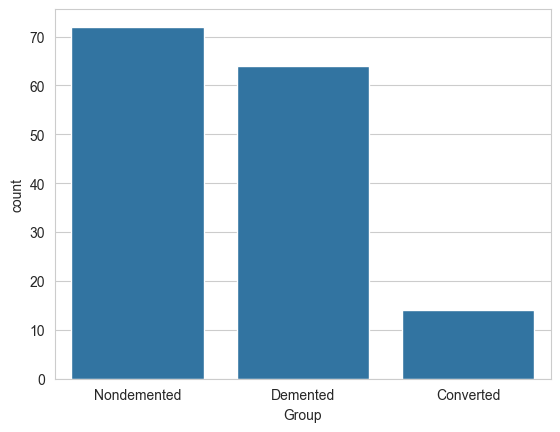

In [8]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

<Axes: xlabel='Group', ylabel='count'>

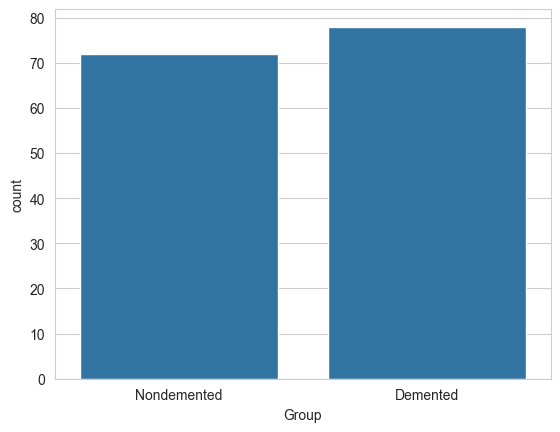

In [9]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

M/F           M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

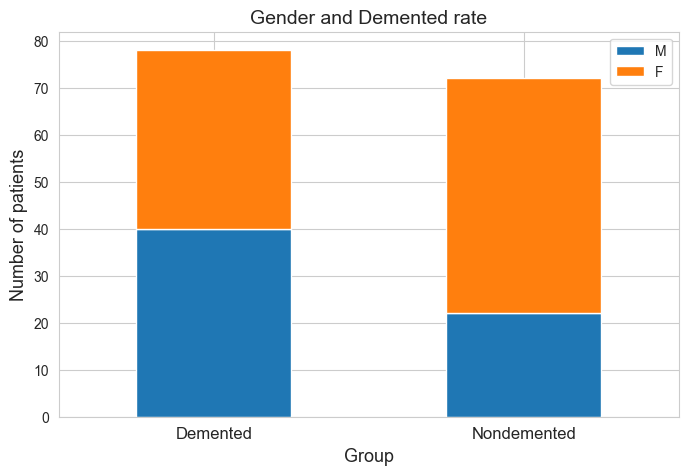

In [10]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

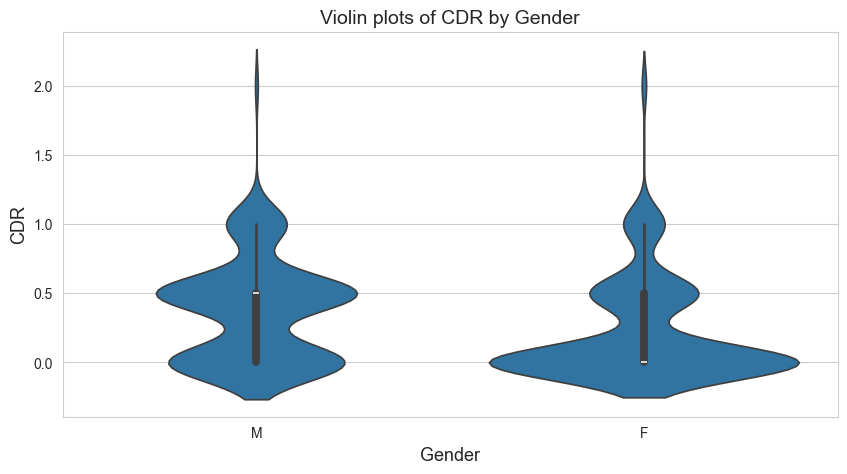

In [11]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

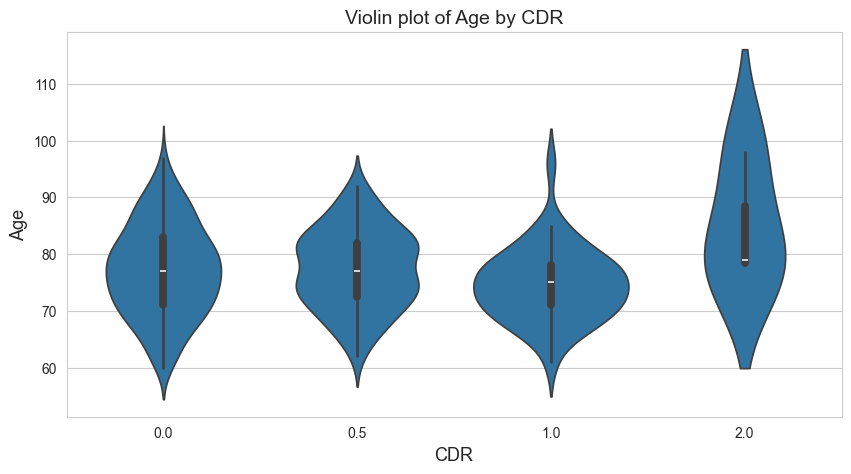

In [12]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

In [13]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


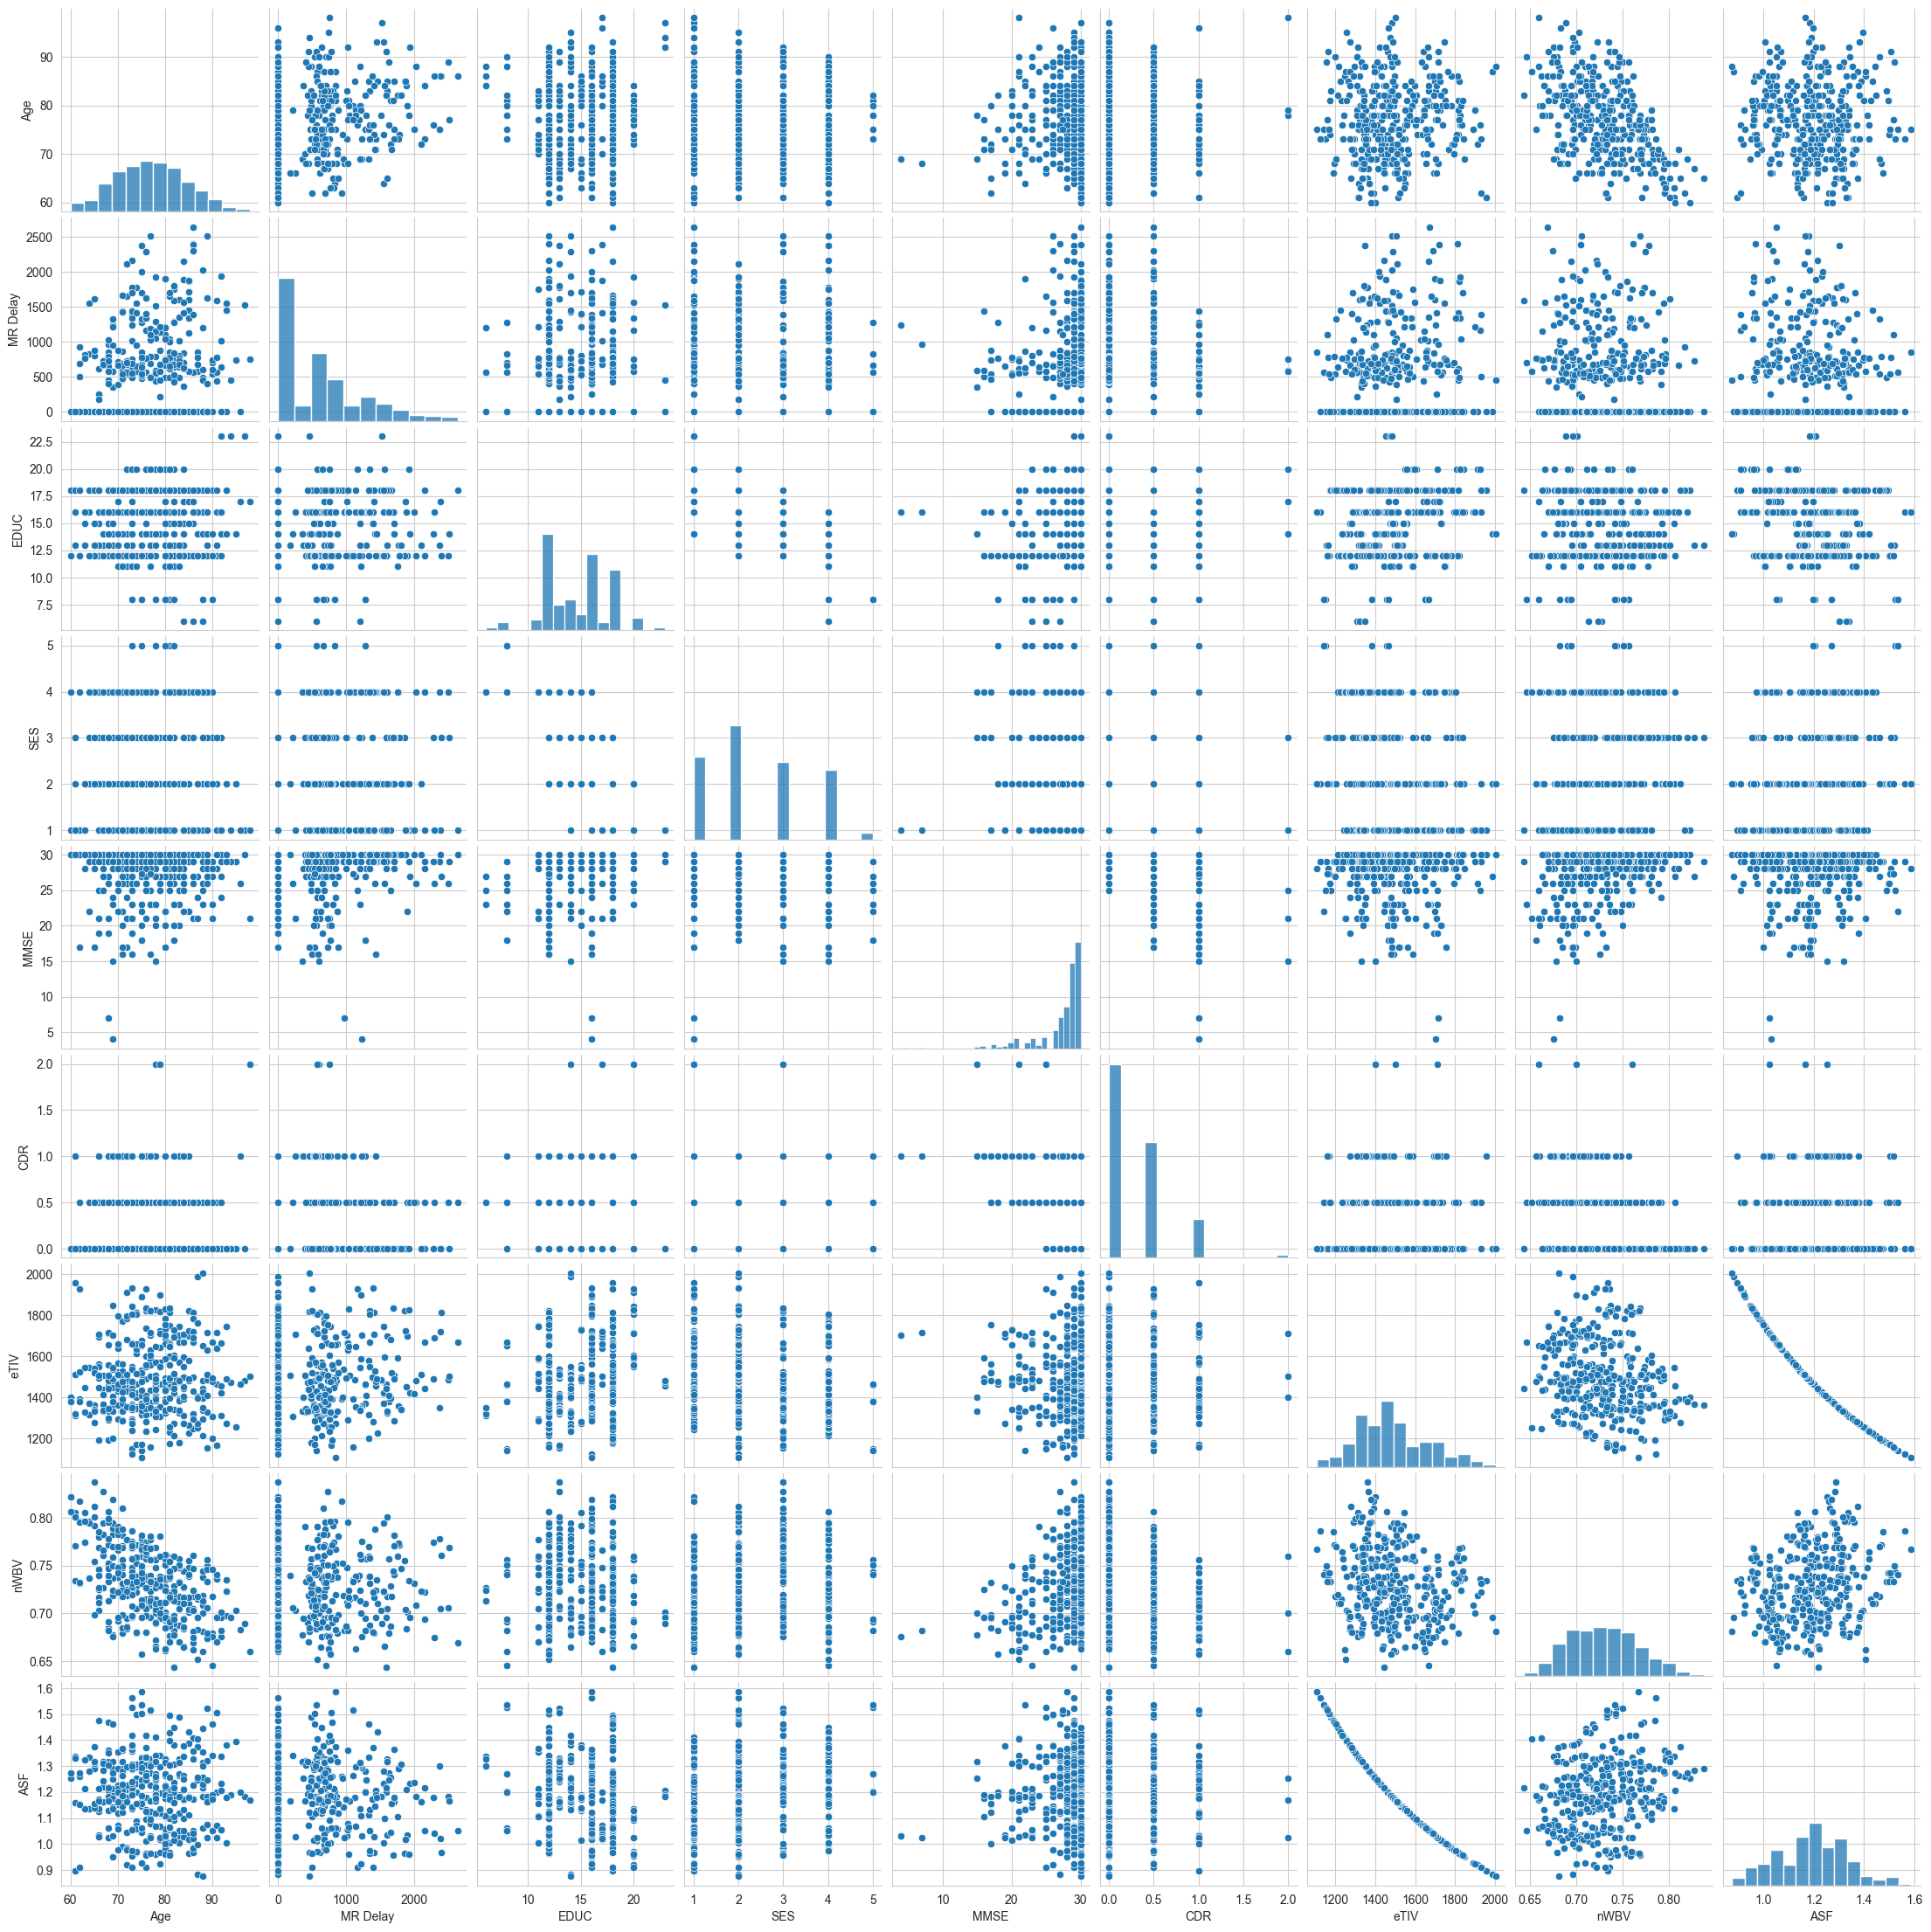

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

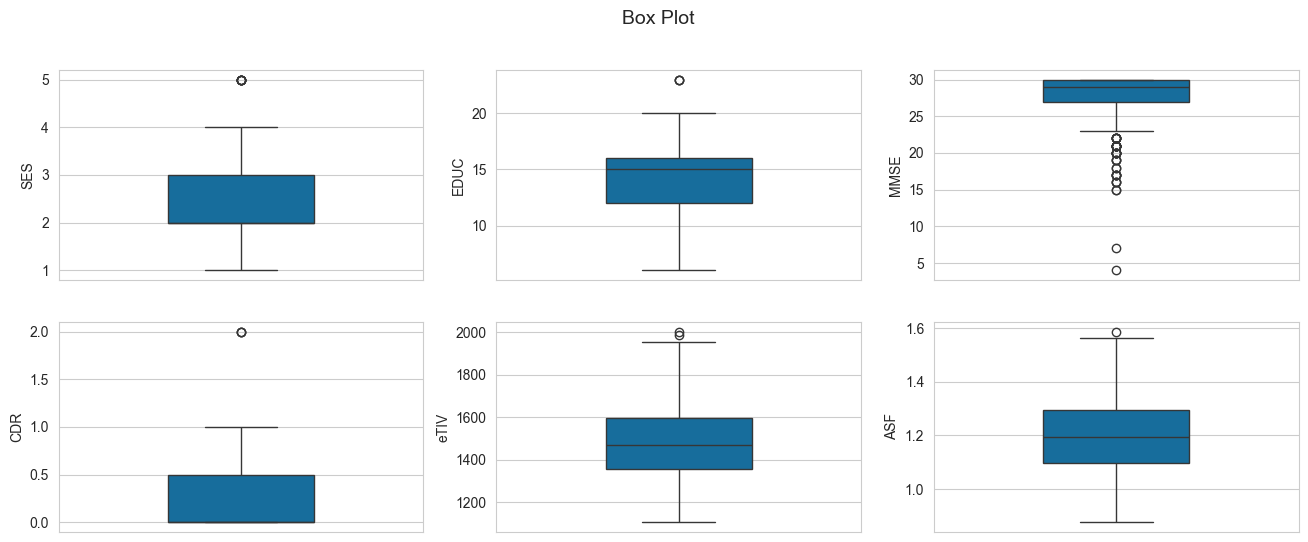

In [15]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

In [16]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [17]:
def plot_correlation_map(df):
    numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
    corr = numeric_df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", ax=ax)
    plt.show()

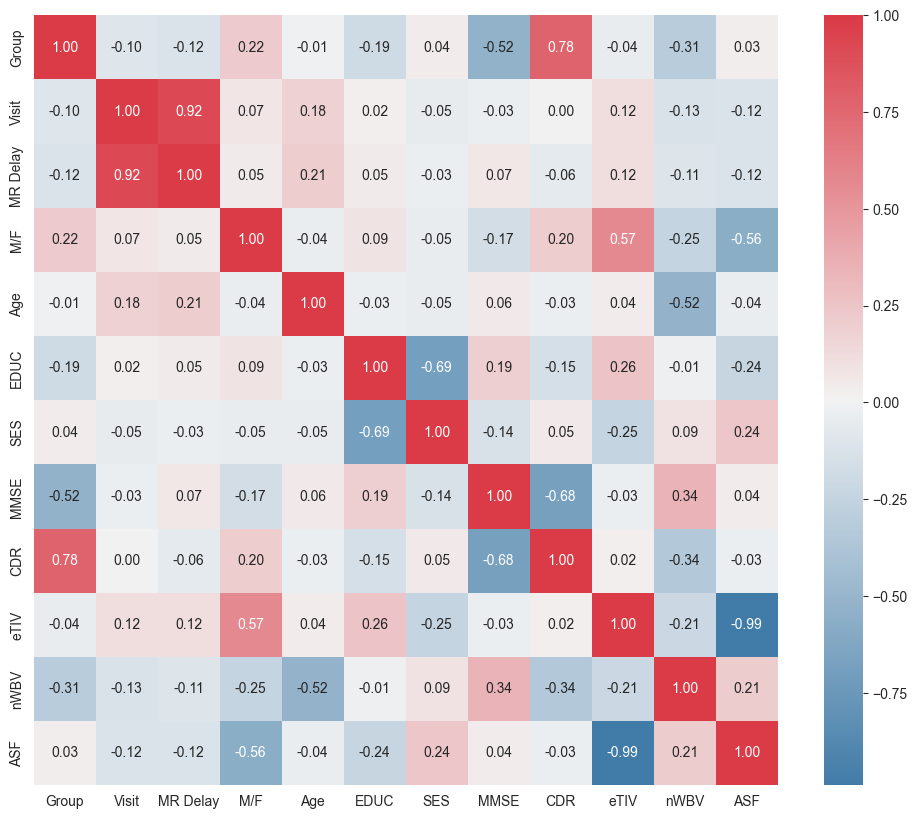

In [18]:
plot_correlation_map(df)

In [19]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

---

# From phishguard, taking codes

In [20]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import pandas as pd

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values.ravel()  # Ensure y is 1D

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization (but before oversampling)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = np.array(feature_col_names)[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

param_grid = {
    'C': [0.1, 1, 10, 100],  # Add different C values for regularization
    'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
}
for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation
    svc.fit(X_train_cfg, y_train_cfg)

    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    df_metrics = pd.DataFrame(metrics_dict)
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    print("\nClassification Report for the SVM Model:\n")
    print(metrics.classification_report(y_test, y_test_svc))

    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 7

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 7

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 6

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...
